In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing import preprocess_dataframe

In [2]:
df_train = pd.read_csv("./data/no1_train.csv")
df_test = pd.read_csv("./data/no1_validation.csv")

In [3]:
df_train, scaler = preprocess_dataframe(df_train)
df_test, _ = preprocess_dataframe(df_test)

/Users/jorgenr/Code/School/IT3030-Deep-Learning/Project3/preprocessing.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])
/Users/jorgenr/Code/School/IT3030-Deep-Learning/Project3/preprocessing.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_prev"] = df["y"].shift(1)
/Users/jorgenr/Code/School/IT3030-Deep-Learning/Project3/preprocessing.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

<AxesSubplot:ylabel='sum'>

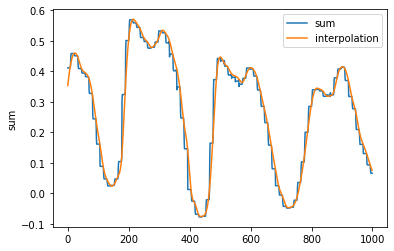

In [5]:
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='sum', label="sum")
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='interpolation', label="interpolation")

<AxesSubplot:ylabel='time_of_week'>

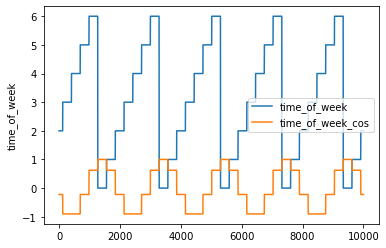

In [5]:
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week", label="time_of_week")
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week_cos", label="time_of_week_cos")

In [7]:
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,...,2.246360e+05,224636.000000,2.246360e+05,2.246360e+05,224636.000000,224636.000000,224636.000000,224635.000000,224348.000000,224518.000000
mean,0.042770,0.070200,0.696594,-0.368029,0.071733,-0.379876,0.259172,0.145067,11.506637,3.004879,...,5.660265e-05,-0.001250,5.704966e-02,-3.258831e-06,-0.223345,-0.113839,-0.224542,-0.379876,-0.380058,-0.379457
std,0.346177,0.434946,0.278710,0.534432,0.354284,0.190428,0.067219,0.424250,6.922453,1.999286,...,7.069566e-01,0.706932,7.216346e-01,7.071241e-01,0.421804,0.117268,0.420954,0.190429,0.190451,0.166178
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.846187
25%,-0.184348,-0.221123,0.719844,-0.822006,-0.146181,-0.472087,0.271889,-0.177888,6.000000,1.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,-0.572588,-0.152574,-0.572158,-0.472087,-0.472195,-0.455220
50%,0.081771,0.083161,0.719844,-0.525818,0.118488,-0.391464,0.271889,0.159843,12.000000,3.000000,...,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,-0.268755,-0.114056,-0.270317,-0.391465,-0.391654,-0.391615
75%,0.290745,0.407118,0.875486,0.005568,0.317267,-0.306072,0.271889,0.498409,18.000000,5.000000,...,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,0.100052,-0.091921,0.098058,-0.306071,-0.306351,-0.317241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.790496


In [8]:
df_test.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,28078.000000,...,2.807800e+04,28078.000000,2.807800e+04,2.807800e+04,28078.000000,28078.000000,28078.000000,28077.000000,27790.000000,27832.000000
mean,0.293962,0.121795,0.403542,-0.249510,0.281744,0.720182,0.556550,-0.041658,11.503526,3.000356,...,-2.009700e-03,-0.002833,-5.326785e-02,-4.295953e-04,0.027457,-0.005065,-0.015546,0.720183,0.720221,0.719419
std,0.353526,0.428324,0.682885,0.609787,0.339352,0.171742,0.182192,0.442225,6.912952,1.996060,...,7.066195e-01,0.706903,4.475491e-01,7.070752e-01,0.352044,0.037217,0.366417,0.171745,0.172574,0.156096
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000e+00,-0.900969,-8.660254e-01,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.624498
25%,0.017823,-0.154104,0.740260,-0.803211,0.034728,0.675193,0.605096,-0.354842,6.000000,1.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,-0.219625,-0.015033,-0.271512,0.675193,0.674910,0.692326
50%,0.261402,-0.066235,0.740260,-0.439200,0.240382,0.743028,0.605096,-0.168418,12.000000,3.000000,...,-1.836970e-16,-0.222521,6.123234e-17,-1.836970e-16,0.016244,-0.004633,-0.027610,0.743031,0.743488,0.735752
75%,0.555135,0.148680,0.740260,0.284889,0.502663,0.799684,0.605096,0.327151,17.000000,5.000000,...,7.071068e-01,0.623490,5.000000e-01,5.000000e-01,0.263376,0.001639,0.228552,0.799689,0.800395,0.785516
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,...,1.000000e+00,1.000000,5.000000e-01,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.883134


In [6]:
df_train.to_csv("./data/train_dataset_3.csv", index=False)
df_test.to_csv("./data/test_dataset_3.csv", index=False)